## ПРАКТИЧНА РОБОТА 10

### Варіант 15

Завдання: Створити, навчити та оцінити нейронну мережу для класифікації зображень з датасету cifar10. Мережа повинна містити чотири шари та бути побудована без використання згорткових шарів. Також потрібно вивести графіки функції втрат і точності під час тренування та розпізнати 10 випадкових зображень з тестового набору. 

In [1]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


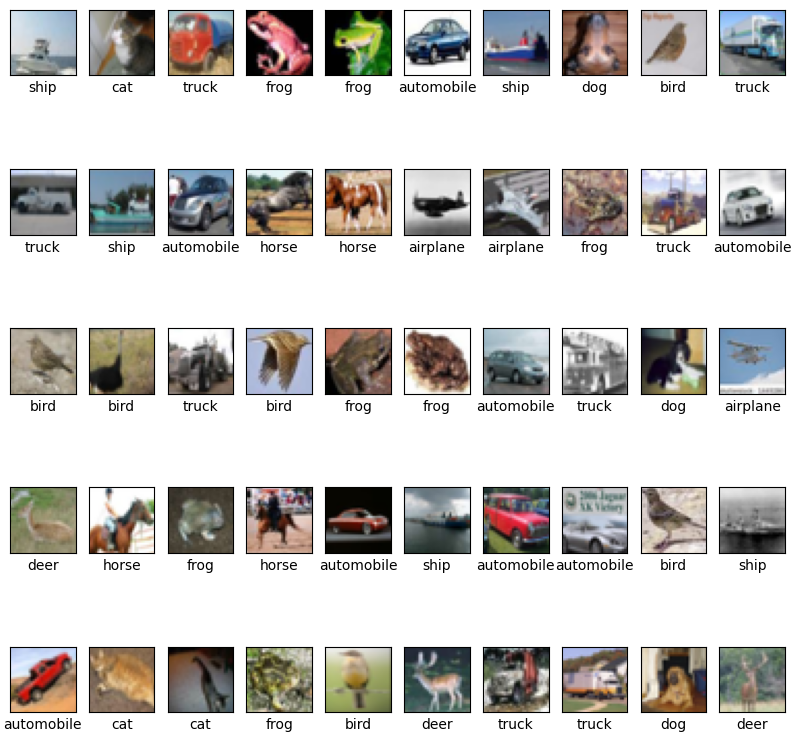

In [3]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.squeeze(y_train[i])])

In [4]:
# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
625/625 [=========================

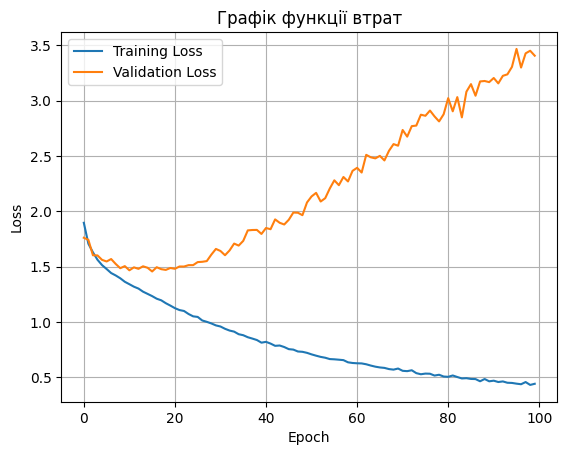

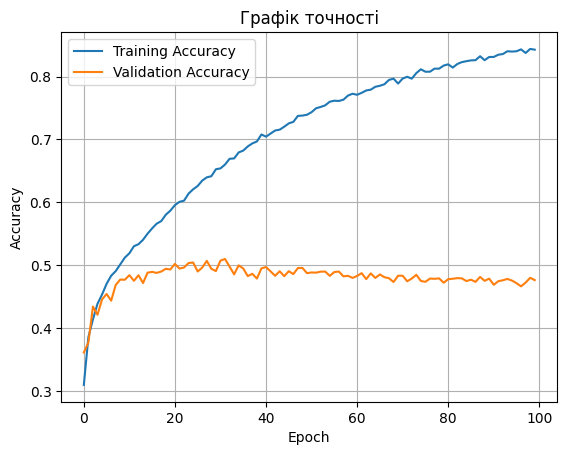

In [6]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()


313/313 - 1s - loss: 3.3416 - accuracy: 0.4731 - 1s/epoch - 3ms/step

Test Accuracy: 47.31%
1/1 [==============================] - 0s 288ms/step
Image 1: Predicted Class 6, True Class 6
Image 2: Predicted Class 3, True Class 3
Image 3: Predicted Class 5, True Class 4
Image 4: Predicted Class 6, True Class 7
Image 5: Predicted Class 7, True Class 7
Image 6: Predicted Class 9, True Class 9
Image 7: Predicted Class 9, True Class 9
Image 8: Predicted Class 1, True Class 1
Image 9: Predicted Class 6, True Class 3
Image 10: Predicted Class 4, True Class 2


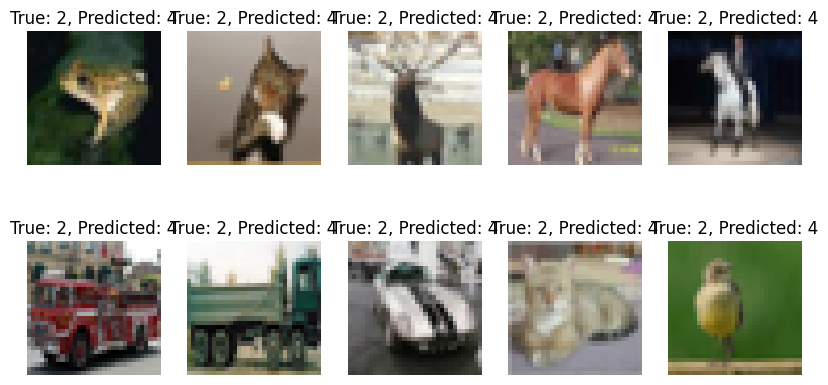

In [7]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

In [8]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 3.3416
Test Accuracy: 47.31%

Total Parameters: 1738890

Layer 1: flatten
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense
Number of Parameters: 1573376
Input Shape: (None, 3072), Output Shape: (None, 512)

Layer 3: dense_1
Number of Parameters: 131328
Input Shape: (None, 512), Output Shape: (None, 256)

Layer 4: dense_2
Number of Parameters: 32896
Input Shape: (None, 256), Output Shape: (None, 128)

Layer 5: dense_3
Number of Parameters: 1290
Input Shape: (None, 128), Output Shape: (None, 10)


Висновок: Загалом, нейронна мережа показала добрі результати у класифікації зображень з датасету cifar10. Однак, можливі шляхи поліпшення результатів можуть включати зміну архітектури мережі,зміну кількості епох та використання згорткових шарів або використання більш складних алгоритмів тренування.